# Hydro unit commitment problem

## Introduction

Given a set of production units, the unit commitment problem consists in determining the status (on/off) of each unit at each period as well as the quantity of electricity to produce, in order to maximize the profit or satisfy demands while minimizing operational costs.

Here, we focus on hydropower generation.

The powerhouse contains a turbine and a generator. The water goes from the upstream reservoir to the downstream river through the penstock, passing by the powerhouse. The flow of water through the pales of a turbine generates electricity which is then transferred from the generator to its final destination through the long distance power lines. The water that passes through the penstock is used to generate power, but water could also be released from the reservoir directly to the downstream river. This water is said to be spilled, as it is not used for production, but rather to avoid an overflow
of the reservoir.

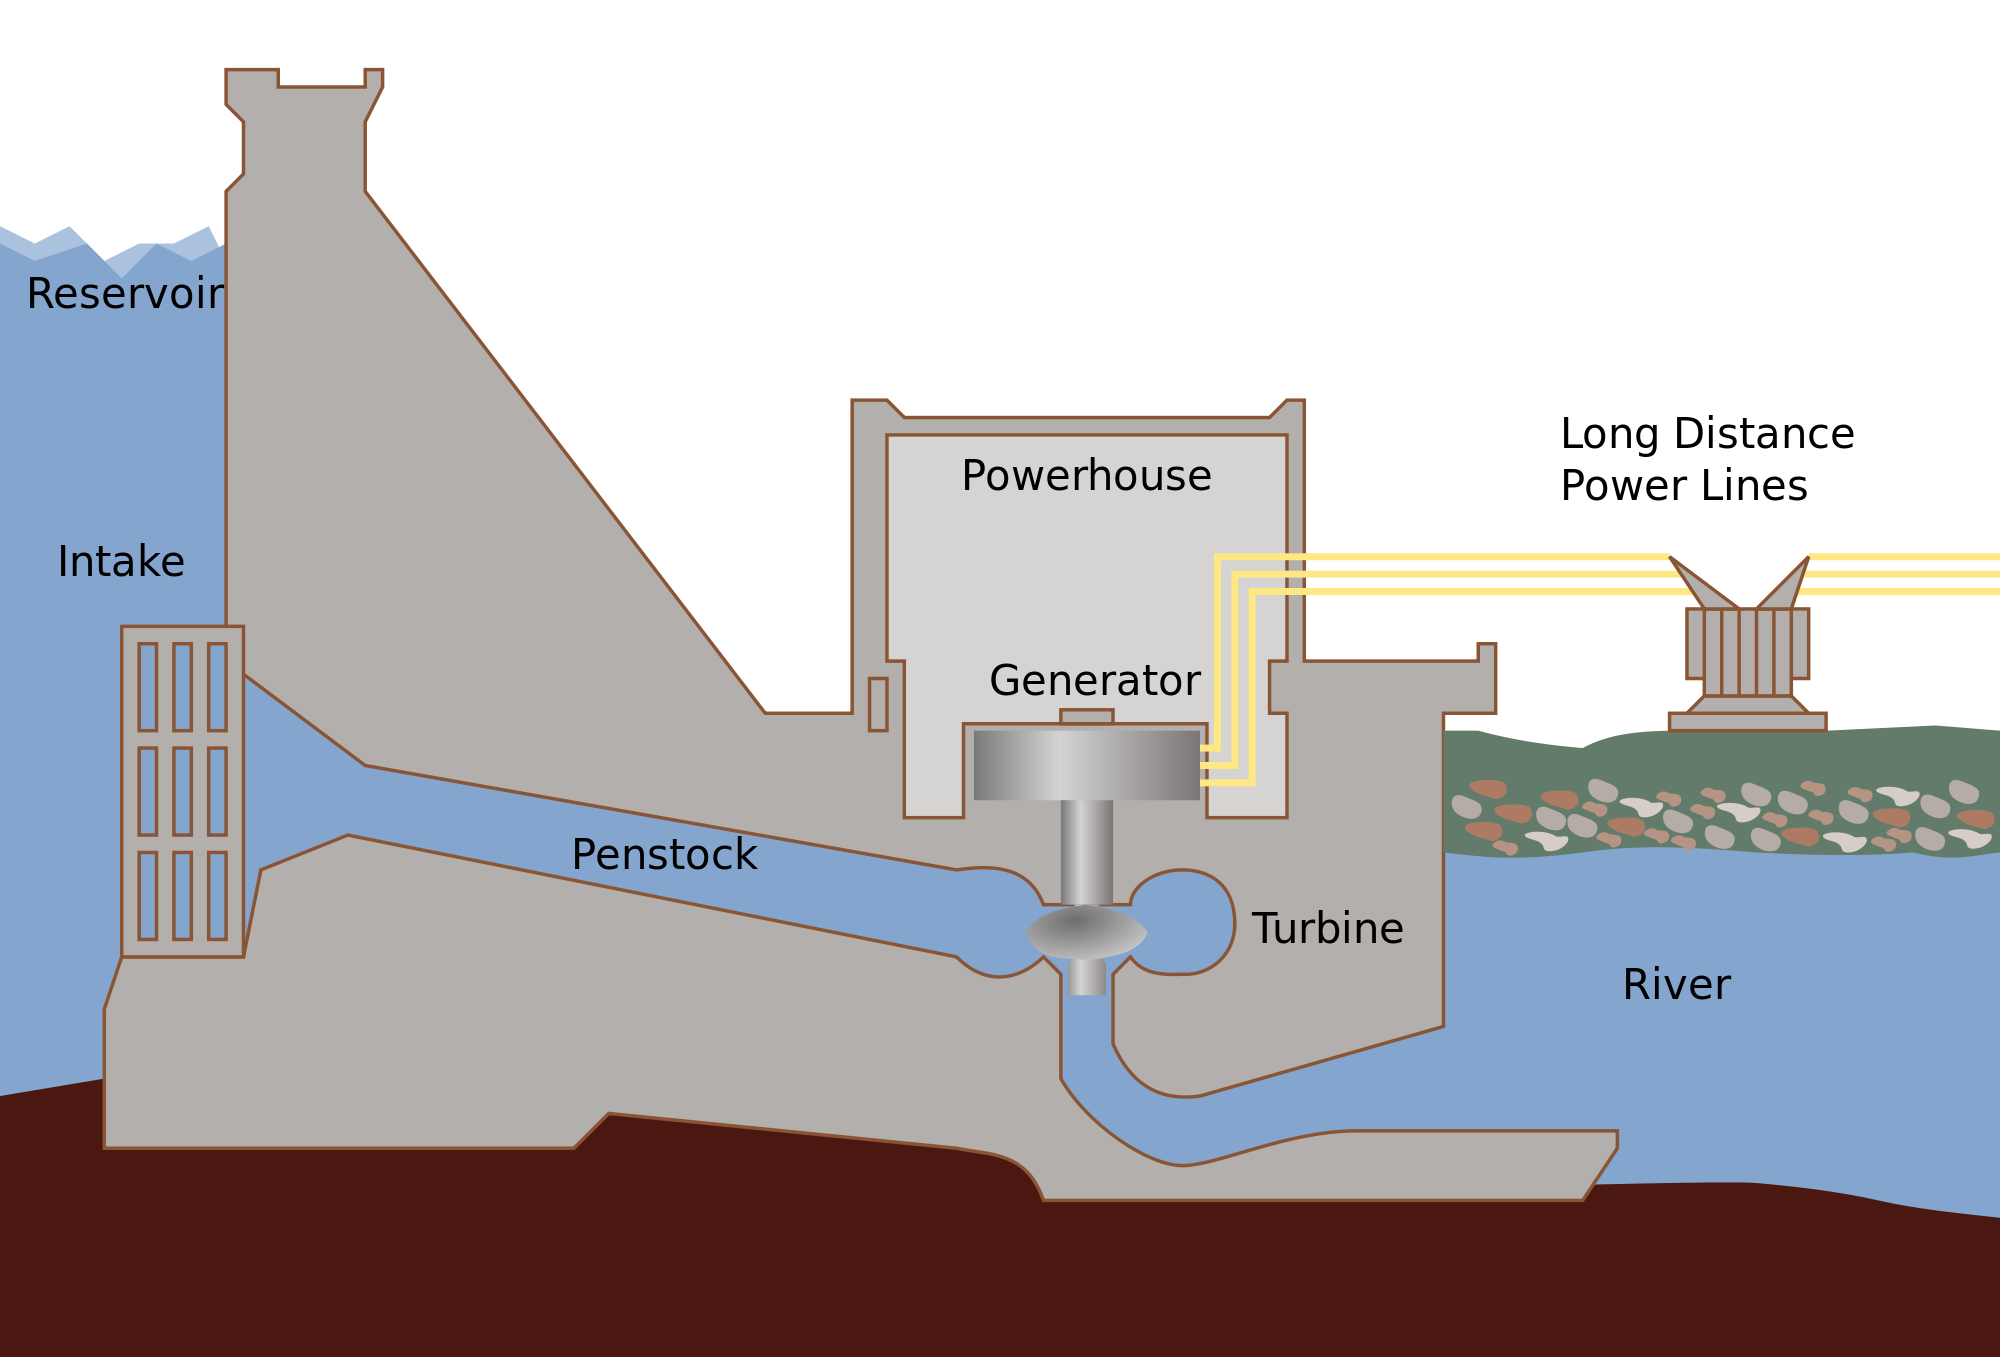
Image source: https://commons.wikimedia.org/wiki/File:Hydroelectric_dam-es.svg

The quantity of electricity $p_{j, t}$ produced by turbine $j$ at period $t$ is a nonlinear function of the net head $h^{net}_{t}$ and the water discharge $q_{j,t}$:

$$
		p_{j,t} = \eta_j \cdot q_{j,t} \cdot h^{net}_{t}
$$
where $\eta_j$ is called the efficiency of turbine $j$.

## Problem description

Here, we consider a problem composed of **several turbines and one reservoir**. The objective is to **maximize the revenue from selling generated power**.

**Input**:
* $H$ periods; for each period $t = 1, \dots, H$
  * a profit $R_t$ for selling a unit of electricty
  * an inflow $\Omega_t$
* $N$ turbines; for each turbine $i = 1, \dots, N$:
  * a minimum discharge $Q^\text{min}_j$
  * a maximum discharge $Q^\text{max}_j$
  * a minimum production $P^\text{min}_j$
  * a maximum production $P^\text{max}_j$
  * an efficiency $\eta_i$
* a minimum volume $V^\text{min}$ for the reservoir
* a maximum volume $V^\text{max}$ for the reservoir
* an initial volume $V^\text{init}$ for the reservoir
* a minimum final $V^\text{final}$ volume for the reservoir
* a function $F^\text{head}(v) = A^\text{head} v + B^\text{head}$ that returns the headwater depending on the volume in the reservoir
* a function $F^\text{tail}(q, s) = A^\text{tail}_q q + A^\text{tail}_s s + B^\text{tail}$ that returns the tailwater depending on the water discharge and the spilled water

**Problem**: find the quantity of water to send in each turbine at each period such that:
* The volume in the reservoir always stays in $[V^\text{min}, V^\text{max}]$
* The initial volume is equal to $V^\text{init}$
* The final volume is greater than $V^\text{final}$
* If a turbin is used
  * the water discharge in this turbine belongs to $[Q^\text{min}, Q^\text{max}]$; otherwise, it is null.
  * the production of this turbine belongs to $[P^\text{min}, P^\text{max}]$; otherwise, it is null.

**Objective**: maximize the profit

## Mixed-integer nonlinear program

**Variables**:

* $x_{j, t} \in \{ 0, 1 \}$, $j = 1, \dots, N$, $t = 1, \dots, H$: $x_{j, t} = 1$ iff turbine $j$ is on at period $t$, otherwise $0$.
* $q_{j, t} \in [0, Q_j^\text{max}]$, $j = 1, \dots, N$, $t = 1, \dots, H$: water discharge in turbine $j$ at period $t$.
* $q^\text{tot}_t \in \mathbb{R}$, $t = 1, \dots, H$: total water discharge at period $t$.
* $s_t \in \mathbb{R}^+$, $t = 1, \dots, H$: water spilled at period $t$.
* $p_{j, t} \in [0, P_j^\text{max}]$, $j = 1, \dots, N$, $t = 1, \dots, H$: production of turbine $j$ at period $t$
* $v_t \in [V^\text{min}, V^\text{max}]$: volume in the reservoir at period $t$
* $h^\text{head}_t \in \mathbb{R}$, $t = 1, \dots, N$: head water at period $t$
* $h^\text{tail}_t \in \mathbb{R}$, $t = 1, \dots, N$: tail water at period $t$
* $h^\text{net}_t \in \mathbb{R}$, $t = 1, \dots, N$: net head at period $t$

**Objective**: maximize the profit

$$ \max \sum_{t = 1}^H \sum_{j = 1}^N R_t p_{j, t} $$

**Constraints**:

* Initial and final volume:

$$ v_1 = V^\text{init} $$
$$ v_h \ge V^\text{final} $$

* Water balance: volume at $t$ = volume at $t - 1$ + inflow at $t$ - consumption at $t$

$$ \forall t = 2, \dots, H \qquad v_t = v_{t - 1} + 3600 \cdot \Omega_t - 3600 \cdot q^\text{tot}_t - 3600 \cdot s_t $$

* Water discharge limits

$$ \forall j = 1, \dots, N \quad \forall t = 1, \dots, H \qquad q_{j, t} \ge Q_j^\text{min} x_{j, t} $$
$$ \forall j = 1, \dots, N \quad \forall t = 1, \dots, H \qquad q_{j, t} \le Q_j^\text{max} x_{j, t} $$

* Production limits

$$ \forall j = 1, \dots, N \quad \forall t = 1, \dots, H \qquad p_{j, t} \ge P_j^\text{min} x_{j, t} $$
$$ \forall j = 1, \dots, N \quad \forall t = 1, \dots, H \qquad p_{j, t} \le P_j^\text{max} x_{j, t} $$

* Total water discharge

$$ \forall t = 1, \dots, H \qquad q_t^\text{tot} = \sum_{j = 1}^N q_{j, t} $$

* Headwater

$$ \forall t = 1, \dots, H \qquad h_t^\text{head} = A^\text{head} v_t + B^\text{head} $$

* Tailwater

$$ \forall t = 1, \dots, H \qquad h_t^\text{tail} = A^\text{tail}_q q^\text{tot}_t + A^\text{tail}_s s_t + B^\text{tail} $$

* Net head

$$ \forall t = 1, \dots, H \qquad h_t^\text{net} = h_t^{head} - h_t^{tail} $$

* Hydropower production function

$$ \forall j = 1, \dots, N \quad \forall t = 1, \dots, H \qquad p_{j, t} \le \eta_j \cdot q_{j,t} \cdot h^{net}_{t} $$

The model has the following properties:
* Continuous and binary variables
* Quadratic structures
* Non-convex
* Therefore, it is a non-convex MIQCQP

We solve the problem with Artelys Knitro using the [Pyomo](http://www.pyomo.org/) modeler.

## Input data

First, let's build some input data.

In [7]:
import random
import math

class Period:
    
    def __init__(self):
        self.profit = None
        self.inflow = None
    
class Turbine:
    
    def __init__(self):
        self.efficiency = None
        self.minimum_discharge = None
        self.maximum_discharge = None
        self.minimum_production = None
        self.maximum_production = None

class HucInstance:
    
    def __init__(self, number_of_periods, number_of_turbines):
        # Periods.
        self.periods = [Period() for _ in range(number_of_periods)]
        # Turbines.
        self.turbines = [Turbine() for _ in range(number_of_turbines)]
        # Minimum volume in the reservoir.
        self.minimum_volume = None
        # Initial volume in the reservoir.
        self.initial_volume = None
        # Maximum volume in the reservoir.
        self.maximum_volume = None
        # Coefficients of the headwater function.
        a_head = None
        b_head = None
        # Coefficients of the tailwater function.
        a_tail_q = None
        a_tail_s = None
        b_tail = None
        
        # Fill some data.
        random.seed(number_of_periods * number_of_turbines)
        self.minimum_volume = 5e6
        self.maximum_volume = 30e6
        self.initial_volume = 25e6
        self.final_volume = 25e6
        self.a_head = 1e-07
        self.b_head = 50
        self.a_tail_q = 0.005
        self.a_tail_s = 0.001
        self.b_tail = 30
        for turbine in self.turbines:
            # 0 <= minimum_production <= maximum_production <= 50
            turbine.minimum_production = random.uniform(0, 10)
            turbine.maximum_production = turbine.minimum_production + random.uniform(0, 40)
            # 0 <= minimum_discharge <= maximum_discharge <= 100
            turbine.minimum_discharge = random.triangular(0, 100, 10)
            mode = max(turbine.minimum_discharge, 90)
            turbine.maximum_discharge = random.triangular(turbine.minimum_discharge, 100, mode)
            # 0.5 * rho_water * g <= efficiency <= 0.9 * rho_water * g
            turbine.efficiency = random.uniform(0.5, 0.9) * 0.000001 * 1000 * 9.81
        for t, period in enumerate(self.periods):
            # 10 <= inflow <= 100
            period.inflow = random.uniform(10, 100) * number_of_turbines
            # 10 <= profit <= 100
            ref = 40 * (1 + math.cos(t / 24 * 2 * math.pi)) + 10
            period.profit = ref + random.uniform(-10, 10)

## Pyomo model

Now, let's write the model with Pyomo.

In [11]:
import pyomo.environ as pyo

n = 10
h = 168
instance = HucInstance(h, n)

# Create a model
model = pyo.ConcreteModel()

####################
# Create variables #
####################

model.N = pyo.RangeSet(0, n - 1)
model.H = pyo.RangeSet(0, h - 1)

# Variables x_{j, t}.
model.x = pyo.Var(model.N, model.H, within=pyo.Binary)

# Variables q_{j, t}.
model.q = pyo.Var(model.N, model.H, within=pyo.NonNegativeReals)

# Variables p_{j, t}
model.p = pyo.Var(model.N, model.H, within=pyo.NonNegativeReals)

# Variables q_t.
model.qtot = pyo.Var(model.H, within=pyo.NonNegativeReals)

# Variables s_t.
model.s = pyo.Var(model.H, within=pyo.NonNegativeReals)

# Variables v_t.
model.v = pyo.Var(model.H, within=pyo.NonNegativeReals, bounds=(instance.minimum_volume, instance.maximum_volume))

# Variables h^\text{head}_t.
model.h_head = pyo.Var(model.H, within=pyo.Reals)

# Variables h^\text{tail}_t.
model.h_tail = pyo.Var(model.H, within=pyo.Reals)

# Variables h^\text{net}_t.
model.h_net = pyo.Var(model.H, within=pyo.NonNegativeReals)

#############
# Objective #
#############

model.objective = pyo.Objective(
        expr=pyo.quicksum(instance.periods[t].profit * model.p[j,t]
                      for j in model.N
                      for t in model.H),
        sense=pyo.maximize)

###############
# Constraints #
###############

# Constraints: water balance.
def water_balance_rule(model, t):
    return model.v[t] == model.v[t - 1] + 3600 * instance.periods[t].inflow - 3600 * model.qtot[t] - 3600 * model.s[t]
model.constraints_water_balance = pyo.Constraint(pyo.RangeSet(1, h - 1), rule=water_balance_rule)

# Constraints: minimum production
def minimum_production_rule(model, t, j):
    return model.p[j,t] >= instance.turbines[j].minimum_production * model.x[j,t]
model.constraints_minimum_production = pyo.Constraint(model.H, model.N, rule=minimum_production_rule)

# Constraints: maximum production
def maximum_production_rule(model, t, j):
    return model.p[j,t] <= instance.turbines[j].maximum_production * model.x[j,t]
model.constraints_maximum_production = pyo.Constraint(model.H, model.N, rule=maximum_production_rule)

# Constraints: minimum discharge
def minimum_discharge_rule(model, t, j):
    return model.q[j,t] >= instance.turbines[j].minimum_discharge * model.x[j,t]
model.constraints_minimum_discharge = pyo.Constraint(model.H, model.N, rule=minimum_discharge_rule)

# Constraints: maximum discharge
def maximum_discharge_rule(model, t, j):
    return model.q[j,t] <= instance.turbines[j].maximum_discharge * model.x[j,t]
model.constraints_maximum_discharge = pyo.Constraint(model.H, model.N, rule=maximum_discharge_rule)

# Constraints: total water discharge.
def total_water_discharge_rule(model, t):
    return model.qtot[t] == pyo.quicksum(model.q[j,t] for j in model.N)
model.constraints_total_water_discharge = pyo.Constraint(model.H, rule=total_water_discharge_rule)

# Constraints: headwater
def headwater_rule(model, t):
    return model.h_head[t] == instance.a_head * model.v[t] + instance.b_head
model.constraints_headwater = pyo.Constraint(model.H, rule=headwater_rule)

# Constraints: tailwater
# For all t = 1, ..., H, h_t^\text{tail} = A^\text{tail}_q q^\text{tot}_t + A^\text{tail}_s s_t + B^\text{tail}
def tailwater_rule(model, t):
    return model.h_tail[t] == instance.a_tail_q * model.qtot[t] + instance.a_tail_s * model.s[t] + instance.b_tail
model.constraints_tailwater = pyo.Constraint(model.H, rule=tailwater_rule)

# Constraints: nethead
def nethead_rule(model, t):
    return model.h_net[t] == model.h_head[t] - model.h_tail[t]
model.constraints_nethead = pyo.Constraint(model.H, rule=nethead_rule)

# Constraints: hydropower production function
# For all j = 1, ..., N, for all t = 1, ..., H, p_{j, t} <= eta_j q_{j,t} h^\text{net}_{t} $$
def hydropower_production_rule(model, t, j):
    return model.p[j, t] == instance.turbines[j].efficiency * model.q[j, t] * model.h_net[t]
model.constraints_hydropower_production = pyo.Constraint(model.H, model.N, rule=hydropower_production_rule)

# Constraint: initial conditions.
model.constraint_initial_volume = pyo.Constraint(expr=model.v[0] == instance.initial_volume)
model.constraint_final_volume = pyo.Constraint(expr=model.v[h - 1] >= instance.initial_volume)
model.constraint_initial_spilled_water = pyo.Constraint(expr=model.s[0] == 0)
def initial_discharge_rule(model, j):
    return model.q[j, 0] == 0
model.constraints_initial_discharge = pyo.Constraint(model.N, rule=initial_discharge_rule)

# Solve with Knitro.
solver = pyo.SolverFactory('knitroampl')
solver.options["mip_opt_gap_rel"] = 1
solver.options["numthreads"] = 1
results = solver.solve(model, tee=True)

Artelys Knitro 13.2.1: mip_opt_gap_rel=1
numthreads=1

          Commercial License
         Artelys Knitro 13.2.1

MINLP solver shifted start point to satisfy bounds (168 variables).
         The Knitro mixed integer solver is designed for convex problems.
         For non-convex problems it is only a heuristic, and the reported
         bounds and optimality claims cannot be verified.

concurrent_evals:        0
datacheck:               0
hessian_no_f:            1
numthreads:              1
mip_opt_gap_rel:         1
The problem is identified as a MIQCQP.
Knitro changing mip_method from AUTO to 1.
Knitro changing mip_rootalg from AUTO to 1.
Knitro changing mip_lpalg from AUTO to 3.
Knitro changing mip_branchrule from AUTO to 2.
Knitro changing mip_selectrule from AUTO to 2.
Knitro changing mip_mir from AUTO to 2.
Knitro changing mip_clique from AUTO to 0.
Knitro changing mip_zerohalf from AUTO to 0.
Knitro changing mip_liftproject from AUTO to 0.
Knitro changing mip_knapsack from AU

## Output visualization

Now let's plot the solution.

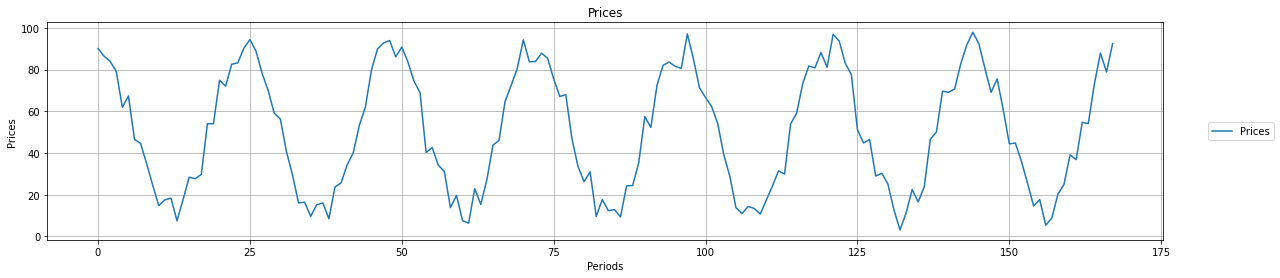

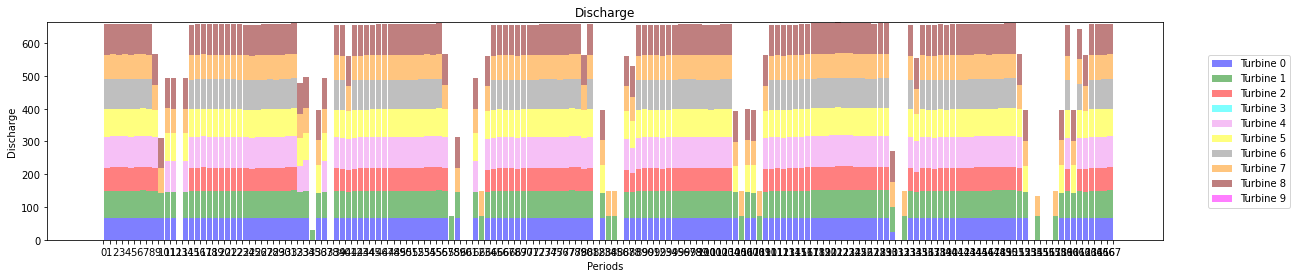

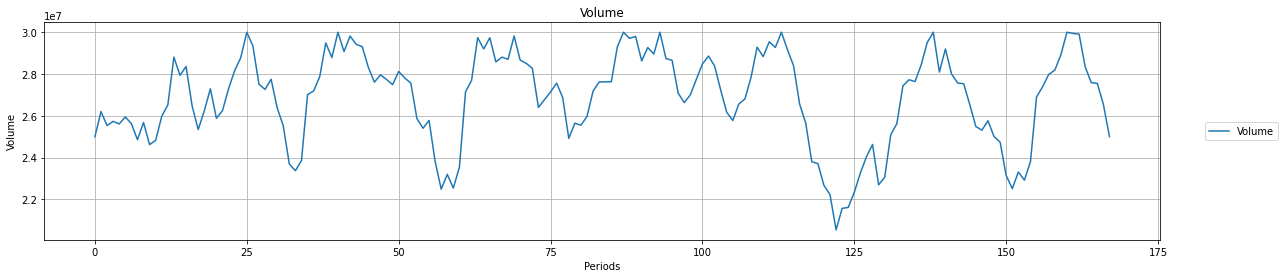

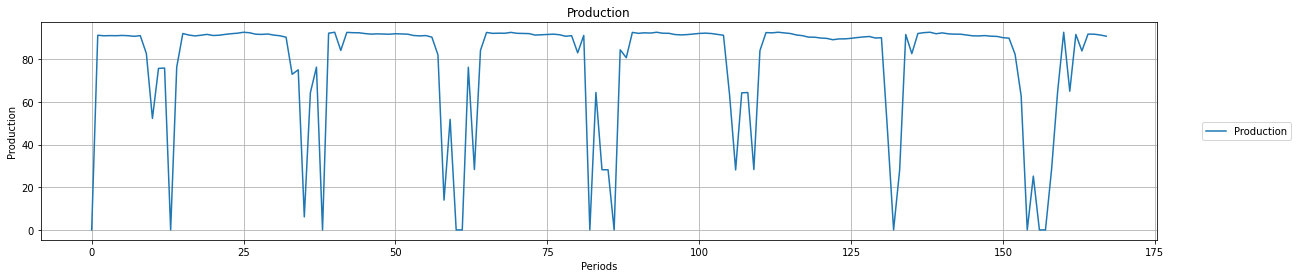

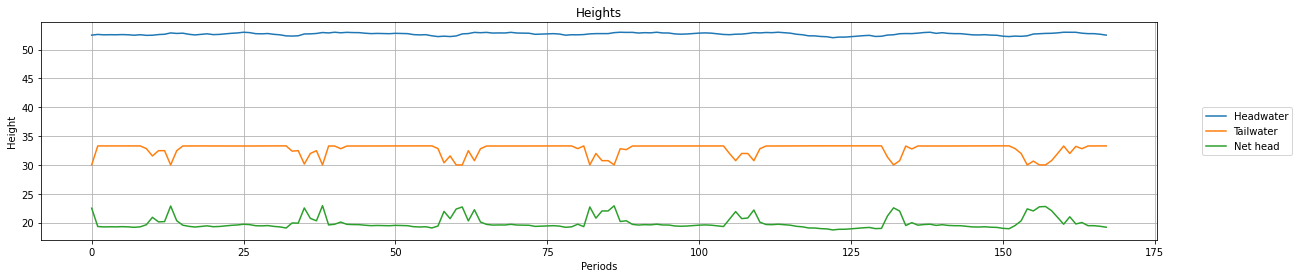

In [12]:
import matplotlib.pyplot as plt
import numpy as np

figwidth = 20
indices = np.arange(h)

# Plot prices.
plt.figure().set_figwidth(figwidth)
plt.plot(indices,
         [instance.periods[t].profit for t in range(h)],
         label="Prices")
plt.grid(True)
plt.ylabel("Prices")
plt.xlabel("Periods")
plt.title("Prices")
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.show()

# Plot solution, discharge for each turbine.
plt.figure().set_figwidth(figwidth)
width = 0.9
colors = ['blue', 'green', 'red', 'cyan', 'violet',"yellow","grey","darkorange","maroon","magenta","lightblue","lightcoral","bisque","slateblue"]
bottom = [0 for _ in range(h)]
for j in range(n):
    values = [model.q[j,t]() for t in range(h)]
    plt.bar(indices,
            values,
            width=width,
            alpha=0.5,
            color=colors[j],
            label="Turbine " + str(j),
            bottom=bottom)
    plt.xticks(indices + .5 * width,
               ['{}'.format(idx) for idx in range(h)])
    for t in range(h):
        bottom[t] += values[t]
plt.title("Discharge")
plt.xlabel("Periods")
plt.ylabel("Discharge")
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.show()

# Plot reservoir volume.
plt.figure().set_figwidth(figwidth)
plt.plot(indices,
         [model.v[t]() for t in range(h)],
         label="Volume")
plt.grid(True)
plt.ylabel("Volume")
plt.xlabel("Periods")
plt.title("Volume")
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.show()

# Plot production.
plt.figure().set_figwidth(figwidth)
plt.plot(indices,
         [sum(model.p[j,t]() for j in range(n)) for t in range(h)],
         label="Production")
plt.grid(True)
plt.ylabel("Production")
plt.xlabel("Periods")
plt.title("Production")
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.show()

# Plot headwater, tailwater and net head.
plt.figure().set_figwidth(figwidth)
plt.plot(indices,
         [model.h_head[t]() for t in indices],
         label="Headwater")
plt.plot(indices,
         [model.h_tail[t]() for t in indices],
         label="Tailwater")
plt.plot(indices,
         [model.h_net[t]() for t in indices],
         label="Net head")
plt.grid(True)
plt.ylabel("Height")
plt.xlabel("Periods")
plt.title("Heights")
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.show()